<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT23/blob/ViktorB9898-Lab1/Lab1/ViktorB9898_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 1: Matrix Factorization**
**Viktor Beck**

# **Abstract**

This programming assingment features three different functions concerning matrix factorization: a sparse matrix-vector product, QR factorization nad a solver for Ax=b.

Each of the functions was implemented based on pseudocode from the book of Professor Hoffman (https://doi-org.focus.lib.kth.se/10.1137/1.9781611976724).

Conclusion: testing of the algorithms delivered good results which means they are at least correct but especially function 2 and 3 are not very efficient.

#**About the code**

In [1]:
"""This program is a lab report in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2023 Viktor Beck (vbeck@kth.se / viktor.beck98@gmail.com)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [2]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes

# **Introduction**

This programming assingment features three different functions concerning matrix factorization: a sparse matrix-vector product, QR factorization and a solver for Ax=b. Such methods are fundamental for solving linear algebra problems numerically. The examples of such problems are endless. Starting from machine learning algorithms to fluid simulations.

The chosen algorithms produce correct results but are in general not the most efficient ones. Efficiency was not tested here but in general, one can say that dense matrix-vector multiplication brings a lot of computational effort. There are other algorithms that are more suitable for large simulations (except maybe function 1) or any other problem that has to work with large matrices and / or has to run a lot of iterations. A solution to this could be parallelizing some of the steps. E.g. matrix-vector multiplication of large matrices is often ported to the GPU for parallel computation.

The input for this Lab report was taken from the book of Professor Hoffman (https://doi-org.focus.lib.kth.se/10.1137/1.9781611976724) which corresponds to the content of the course:

[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/17068)

# **Method**

### **1. Function: sparse matrix-vector product**

Here we simply implement the pseudo code from Lecture 1 (Chapter 5.8). The input is given as a matrix in CRS format and a vector. The output is the matrix-vector product of those.

The function iterates over the rows of the matrix and multiplies each of the (non-zero) entries with the corresponding entry of the vector and sums them up.

In [3]:
def sparse_matvec_product(val, col_idx, row_ptr, x):
    b = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(row_ptr[i]-1,row_ptr[i+1]-1):
            b[i] += val[j]*x[col_idx[j]-1]
    return b

### **2. Function: QR factorization**

Here we use the Gram-Schmidt QR factorization algorithm from Chapter 5.3. The algorithm uses the Gram-Schmidt method to produce the matrices Q and R. In each iteration one of the column vectors of A is taken and iteratively orthogonalized in another loop. After this inner loop the column vector is getting normalized and stored as a column vector of Q. Entries of R are produced as a byproduct along the way.

In [4]:
def QR_factorization(A):
    n = A.shape[0]
    Q = np.zeros([n,n])
    R = np.zeros([n,n])
    i = 0
    for j in range(n):
        v = A[:,j]
        for i in range(j):
            R[i,j] = np.dot(Q[:,i], v)
            v = v - R[i,j]*Q[:,i]
        R[j,j] = np.linalg.norm(v)
        Q[:,j] = v/R[j,j]
    return Q, R

### **3. Function: direct solver Ax=b**

This function is called Richardson iteration solver. It is a rather simple solver for this problem but works nervertheless. The method converges as long as $||I-\alpha A||<1$. 

In every iteration the residual is calculated as $r_{k}=Ax_{k}$ and from that x. By this x takes a step in the direction of the residual with each iteration. The function runs as long as the residual is greater than a certain tolerance.

In [5]:
def richardson_iteration(A, b, alpha, tol):
    n = len(b)
    x = np.zeros(n)
    r = b
    b_norm = np.linalg.norm(b)
    while np.linalg.norm(r)/b_norm > tol:
        r = np.matmul(A,x)
        r = b - r
        x = x + alpha * r
    return x

# **Results**

### **1. Function: sparse matrix-vector product**

In [6]:
# input
# matrix A
val =     np.array([3,2,2,2,1,1,3,2,1,2,3])
col_idx = np.array([1,2,4,2,3,3,3,4,5,5,6])
row_ptr = np.array([1,4,6,7,9,10,12])
# vector x
n = len(row_ptr)-1
x = np.ones(n)

# execute function
b_sparse = sparse_matvec_product(val, col_idx, row_ptr, x)
print(b_sparse)

[7. 3. 1. 5. 1. 5.]


To test if the algorithm works correctly the corresponding dense matrix-vector multiplication is performed:

In [7]:

A = np.array([[3,2,0,2,0,0],
              [0,2,1,0,0,0],
              [0,0,1,0,0,0],
              [0,0,3,2,0,0],
              [0,0,0,0,1,0],
              [0,0,0,0,2,3]])

b_dense = np.matmul(A,x, out=None)

print("b with sparse matrix multiplication:\t", b_sparse)
print("b with dense matrix multiplication:\t", b_dense)

b with sparse matrix multiplication:	 [7. 3. 1. 5. 1. 5.]
b with dense matrix multiplication:	 [7. 3. 1. 5. 1. 5.]


### **2. Function: QR factorization**

One can see that matrix R is upper trianguar:

In [8]:
# arbitrary matrix A
'''
A = np.array([[1,0,0,0],
              [1,0,0,5],
              [0,3,8,3],
              [3,3,3,3,]])
'''
A = np.random.rand(4,4)
# check for rank
print("Rank(A) =", np.linalg.matrix_rank(A))

Q, R = QR_factorization(A)
print("Q:\n",Q)
print("R:\n",R)

Rank(A) = 4
Q:
 [[ 0.68199924 -0.14289077  0.13514966 -0.70441027]
 [ 0.33606173  0.01977186  0.81180873  0.47711442]
 [ 0.6409567  -0.02104702 -0.56799993  0.51585619]
 [ 0.10542328  0.9893171  -0.00878792 -0.10030144]]
R:
 [[1.35384788 0.89162028 1.26204609 0.79034448]
 [0.         0.73558047 0.74951318 0.03668232]
 [0.         0.         0.67203033 0.72197242]
 [0.         0.         0.         0.29381458]]


Calulate Frobenius norms $||Q^TQ-I||_F, ||QR-A||_F$:

In [9]:
print("Norm(A-QR):", np.linalg.norm(A-np.matmul(Q,R), 'fro'))
print("Norm(Q^T*Q-I):", np.linalg.norm(np.matmul(Q.transpose(),Q)-np.eye(Q.shape[0]), 'fro'))

Norm(A-QR): 2.0816681711721685e-16
Norm(Q^T*Q-I): 1.4464646466968441e-15


... one can see that both norms are 0 (considering machine precision).

### **3. Function: direct solver Ax=b**

In [10]:
# input
A = np.array([[1,0,0],
              [1,1,0],
              [0,3,8]])
b = np.array([1,2,3])

# excute function
x = richardson_iteration(A, b, alpha=0.01, tol=10**-8)

# calculate exact solution
y = np.linalg.solve(A,b)

print("x with solver:\t", y)
print("x custom :\t", x)

x with solver:	 [ 1.  1. -0.]
x custom :	 [ 9.99999998e-01  1.00000004e+00 -1.52235605e-08]


Calculate residual $||Ax-b||$ and $||x-y||$ where y is the exact solution:

In [11]:
print("Norm(Ax-b) =", np.linalg.norm(np.matmul(A,x)-b))
print("Norm(x-y) =", np.linalg.norm(x-y))

Norm(Ax-b) = 3.691064427594355e-08
Norm(x-y) = 3.8935891043404126e-08


... one can see that both norms are in the value range of the chosen tolerance. Decreasing the tolerance will increase the precision but also increase computational cost.

Let's visualize the convergence:

Text(0, 0.5, 'error_norm')

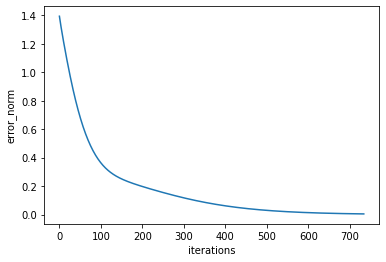

In [12]:
def richardson_iteration_error(A, b, alpha, tol):
    y = np.linalg.solve(A,b)
    n = len(b)
    x = np.zeros(n)
    r = b
    b_norm = np.linalg.norm(b)
    err = []
    while np.linalg.norm(r)/b_norm > tol:
        r = np.matmul(A,x)
        r = b - r
        x = x + alpha * r
        err.append(np.linalg.norm(x-y))
    return err

error = richardson_iteration_error(A, b, alpha=0.01, tol=0.001)

plt.plot(range(len(error)), error)
plt.xlabel("iterations")
plt.ylabel("error_norm")



... one can see that for even a high tolerance a lot of iterations have to be done.

# **Discussion**

Condluding one can say that each of the algorithms fulfills its purpose. As stated in the introduction the efficiency (time and memory) is usually a critical factor which is probably the biggest flaw concerning function 2 and 3. But the used functions are fairly simple and still useful for smaller caclulations that are not critical about efficiency.